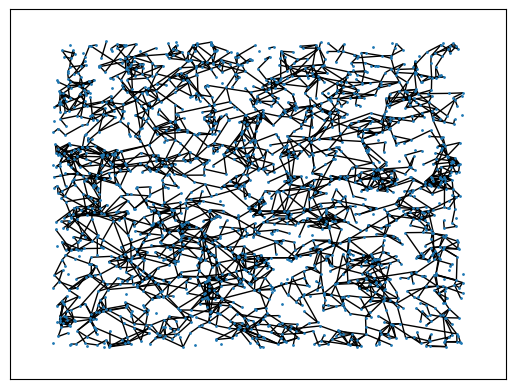

In [ ]:
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

def gera_rede_geografica(n, λ):
    lista_vertices = gera_vertices(n)
    lista_arestas = gera_arestas(lista_vertices, λ)
    return lista_vertices, lista_arestas

def gera_vertices(n):
    lista_vertices = []
    for i in range(n):
        x = random.uniform(0, n)
        y = random.uniform(0, n)
        lista_vertices.append((x, y))
    return lista_vertices

def gera_arestas(lista_vertices, λ):
    lista_arestas = []
    n = len(lista_vertices)
    for i in range(n):
        for j in range(i+1, n):
            x1, y1 = lista_vertices[i]
            x2, y2 = lista_vertices[j]
            dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
            p = math.exp(-λ * dist)
            if random.random() < p:
                lista_arestas.append((i, j, dist))
    return lista_arestas

# Gerar a rede geográfica com n = 2000 e λ = 0.02
n = 2000
λ = 0.03
lista_vertices, lista_arestas = gera_rede_geografica(n, λ)

# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1)
plt.show()



Caminho percorrido (Busca em Profundidade): [0, 1606, 1114, 939, 84, 1962, 1158, 503, 1928, 1507, 1603, 1393, 1423, 403, 726, 1728, 1561, 155, 89, 993, 393, 1689, 1577, 260, 1237, 1399, 243, 1167, 804, 1971, 1699, 1777, 761, 1942, 1963, 1910, 1882, 1109, 1604, 1749, 318, 301, 1269, 347, 1875, 1944, 23, 1574, 275, 1720, 439, 1275, 1511, 1723, 1658, 1516, 1246, 1110, 1028, 1797, 491, 950, 1149, 270, 1652, 1136, 1324, 689, 32, 640, 44, 746, 1553, 1495, 1297, 423, 1458, 1276, 1819, 840, 1991, 1563, 1912, 1847, 830, 1030, 1499, 1605, 1311, 1690, 724, 1487, 1056, 1225, 1930, 1984, 384, 1244, 1818, 1485, 1165, 656, 1290, 77, 1645, 1571, 480, 1943, 506, 1488, 1916, 1887, 1260, 1367, 1885, 1346, 1228, 672, 1082, 1270, 1907, 1424, 1718, 1831, 1408, 943, 1814, 1837, 1914, 1067, 1143, 665, 1919, 988, 1284, 714, 1581, 1336, 660, 1804, 851, 1938, 408, 554, 1147, 1876, 859, 305, 1759, 1491, 511, 1051, 1378, 626, 875, 472, 1222, 1592, 1190, 1474, 1540, 1763, 1433, 1282, 1556, 1213, 1747, 1406, 962, 18

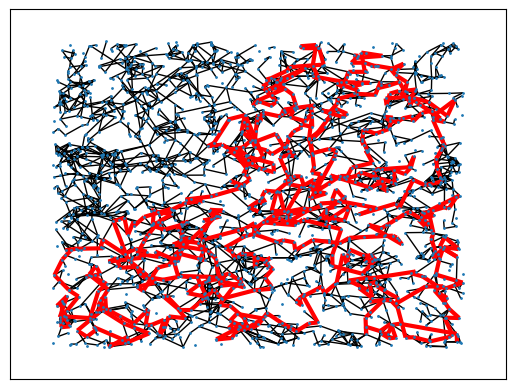

In [ ]:
def busca_em_profundidade(grafo, origem, destino):
    visitados = set()
    pilha = [(origem, [origem])]  # (vértice, caminho)

    while pilha:
        atual, caminho = pilha.pop()

        if atual == destino:
            return caminho

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    pilha.append((vizinho, caminho + [vizinho]))

    return None


# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo completo em branco
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1, edge_color='black')

# Definir a origem e o destino da busca em profundidade
origem = 0
destino = 10

# Executar busca em profundidade
caminho_em_profundidade = busca_em_profundidade(grafo, origem, destino)

if caminho_em_profundidade is not None:
    print("Caminho percorrido (Busca em Profundidade):", caminho_em_profundidade)
else:
    print("Não há caminho entre a origem e o destino (Busca em Profundidade).")

# Destacar o caminho percorrido em verde (Busca em Profundidade)
edges_caminho = [(caminho_em_profundidade[i], caminho_em_profundidade[i+1]) for i in range(len(caminho_em_profundidade)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='red', width=3)

plt.show()


Caminho percorrido (Busca em Largura): [0, 22, 1603, 41, 234, 1866, 881, 1418, 1363, 1934, 363, 819, 1177, 34, 1037, 1486, 780, 152, 10]


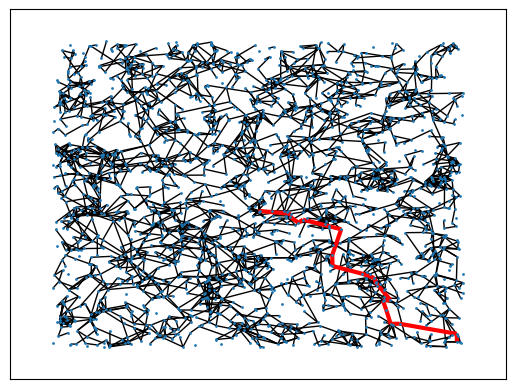

In [ ]:
def busca_em_largura(grafo, origem, destino):
    visitados = set()
    fila = [(origem, [origem])]  # (vértice, caminho)

    while fila:
        atual, caminho = fila.pop(0)

        if atual == destino:
            return caminho

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    fila.append((vizinho, caminho + [vizinho]))

    return None

# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo completo em branco
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1, edge_color='black')

# Definir a origem e o destino da busca em largura
origem = 0
destino = 10

# Executar busca em largura
caminho_em_largura = busca_em_largura(grafo, origem, destino)

if caminho_em_largura is not None:
    print("Caminho percorrido (Busca em Largura):", caminho_em_largura)
else:
    print("Não há caminho entre a origem e o destino (Busca em Largura).")

# Destacar o caminho percorrido em verde (Busca em Largura)
edges_caminho = [(caminho_em_largura[i], caminho_em_largura[i+1]) for i in range(len(caminho_em_largura)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='red', width=3)

plt.show()


Caminho percorrido (Best-First Search): [0, 22, 1603, 41, 234, 1866, 881, 1418, 1363, 1934, 363, 819, 1177, 34, 1037, 1486, 780, 152, 10]


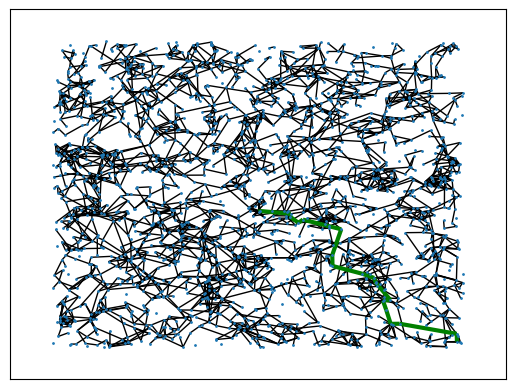

In [ ]:
def busca_best_first(grafo, origem, destino):
    visitados = set()
    fila = [(origem, 0)]  # (vértice, valor_heurístico)

    while fila:
        fila.sort(key=lambda x: x[1])  # Ordenar a fila pelo valor heurístico
        atual, _ = fila.pop(0)

        if atual == destino:
            return nx.shortest_path(grafo, origem, destino)

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    valor_heuristico = calcula_valor_heuristico(grafo, vizinho, destino)
                    fila.append((vizinho, valor_heuristico))

    return None

def calcula_valor_heuristico(grafo, atual, destino):
    x1, y1 = lista_vertices[atual]
    x2, y2 = lista_vertices[destino]
    dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return dist


# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo completo em branco
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1, edge_color='black')

# Definir a origem e o destino da busca Best-First
origem = 0
destino = 10

# Executar busca Best-First
caminho_best_first = busca_best_first(grafo, origem, destino)

if caminho_best_first is not None:
    print("Caminho percorrido (Best-First Search):", caminho_best_first)
else:
    print("Não há caminho entre a origem e o destino (Best-First Search).")

# Destacar o caminho percorrido em verde (Best-First Search)
edges_caminho = [(caminho_best_first[i], caminho_best_first[i+1]) for i in range(len(caminho_best_first)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='green', width=3)

plt.show()


Caminho percorrido (A* Search): [0, 764, 22, 1603, 1507, 41, 234, 1866, 881, 1418, 1363, 1934, 363, 1005, 129, 819, 1816, 1387, 1022, 404, 34, 1037, 1486, 163, 780, 152, 10]


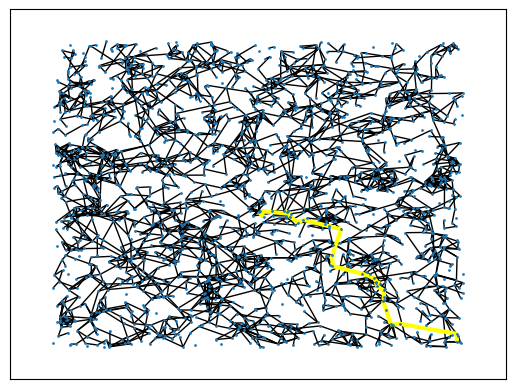

In [ ]:
def busca_a_star(grafo, origem, destino):
    visitados = set()
    fila = [(origem, 0, 0)]  # (vértice, custo_acumulado, valor_heurístico)
    caminho_dict = {origem: None}

    while fila:
        fila.sort(key=lambda x: x[1] + x[2])  # Ordenar a fila pelo custo total (custo_acumulado + valor_heurístico)
        atual, custo_acumulado, _ = fila.pop(0)

        if atual == destino:
            return reconstruir_caminho(caminho_dict, destino)

        if atual not in visitados:
            visitados.add(atual)

            for vizinho in grafo.neighbors(atual):
                if vizinho not in visitados:
                    custo = grafo.edges[(atual, vizinho)]['weight']
                    custo_acumulado_vizinho = custo_acumulado + custo
                    valor_heuristico = calcula_valor_heuristico(grafo, vizinho, destino)
                    custo_total = custo_acumulado_vizinho + valor_heuristico
                    fila.append((vizinho, custo_acumulado_vizinho, valor_heuristico))
                    caminho_dict[vizinho] = atual

    return None

def calcula_valor_heuristico(grafo, atual, destino):
    x1, y1 = lista_vertices[atual]
    x2, y2 = lista_vertices[destino]
    dist = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    return dist

def reconstruir_caminho(caminho_dict, destino):
    caminho = [destino]
    while caminho[-1] is not None:
        caminho.append(caminho_dict[caminho[-1]])
    caminho.reverse()
    return caminho

# Criar um objeto de grafo utilizando NetworkX
grafo = nx.Graph()

# Adicionar os vértices ao grafo
grafo.add_nodes_from(range(n))

# Adicionar as arestas ao grafo
grafo.add_weighted_edges_from(lista_arestas)

# Visualizar o grafo
pos = {i: lista_vertices[i] for i in range(n)}
nx.draw_networkx(grafo, pos=pos, with_labels=False, node_size=1,edge_color='black')

# Definir a origem e o destino da busca A*
origem = 0
destino = 10

# Executar busca A*
caminho_a_star = busca_a_star(grafo, origem, destino)
for item in caminho_a_star:
    if item is None:
        caminho_a_star.remove(item)

if caminho_a_star != "None":
    print("Caminho percorrido (A* Search):", caminho_a_star)
else:
    print("Não há caminho entre a origem e o destino (A* Search).")

# Destacar o caminho percorrido em verde (A* Search)
edges_caminho = [(caminho_a_star[i], caminho_a_star[i+1]) for i in range(len(caminho_a_star)-1)]
nx.draw_networkx_edges(grafo, pos=pos, edgelist=edges_caminho, edge_color='yellow', width=3)

plt.show()


In [ ]:
import time

# Definir a função para calcular a distância percorrida em um caminho
def calcular_distancia_percorrida(grafo, caminho):
    distancia_total = 0
    for i in range(len(caminho) - 1):
        u, v = caminho[i], caminho[i + 1]
        distancia_total += grafo[u][v]['weight']
    return distancia_total

# Definir a função para executar os algoritmos de busca e calcular as estatísticas
def executar_algoritmo(algoritmo, grafo, origem, destino):
    start_time = time.time()
    caminho = algoritmo(grafo, origem, destino)
    for item in caminho:
      if item is None:
        caminho.remove(item)
    end_time = time.time()
    tempo_gasto = end_time - start_time

    if caminho is not None:
        distancia_percorrida = calcular_distancia_percorrida(grafo, caminho)
        return caminho, distancia_percorrida, tempo_gasto
    else:
        return None, float('inf'), tempo_gasto

# Definir a função para calcular a média de uma lista de valores
def calcular_media(lista):
    return sum(lista) / len(lista)

# Selecionar 10 pares distintos de vértices (origem, destino)
pares_vertices = [(1, 100), (22, 230), (36, 679), (67, 896), (5, 567), (6, 60), (79, 700), (86, 800), (92, 925), (100, 145)]

# Lista para armazenar as estatísticas de cada algoritmo
estatisticas = []

# Executar os algoritmos de busca para cada par de vértices
for origem, destino in pares_vertices:
    # Executar Busca em Largura
    caminho, distancia, tempo = executar_algoritmo(busca_em_largura, grafo, origem, destino)
    estatisticas.append(('Busca em Largura', origem, destino, distancia, tempo))

    # Executar Busca em Profundidade
    caminho, distancia, tempo = executar_algoritmo(busca_em_profundidade, grafo, origem, destino)
    estatisticas.append(('Busca em Profundidade', origem, destino, distancia, tempo))

    # Executar Best-First Search
    caminho, distancia, tempo = executar_algoritmo(busca_best_first, grafo, origem, destino)
    estatisticas.append(('Best-First Search', origem, destino, distancia, tempo))

    # Executar A*
    caminho, distancia, tempo = executar_algoritmo(busca_a_star, grafo, origem, destino)
    estatisticas.append(('A*', origem, destino, distancia, tempo))


# Calcular as médias de distância percorrida e tempo gasto para cada algoritmo
media_distancia = {}
media_tempo = {}
for algoritmo, origem, destino, distancia, tempo in estatisticas:
    if algoritmo not in media_distancia:
        media_distancia[algoritmo] = []
        media_tempo[algoritmo] = []

    media_distancia[algoritmo].append(distancia)
    media_tempo[algoritmo].append(tempo)

# Imprimir as médias de distância percorrida e tempo gasto para cada algoritmo
for algoritmo in media_distancia:
    media_distancia_algoritmo = calcular_media(media_distancia[algoritmo])
    media_tempo_algoritmo = calcular_media(media_tempo[algoritmo])

    print(f'Algoritmo: {algoritmo}')
    print(f'Distância média percorrida: {media_distancia_algoritmo}')
    print(f'Tempo médio gasto: {media_tempo_algoritmo}')
    print()


Algoritmo: Busca em Largura
Distância média percorrida: 1593.4551198488987
Tempo médio gasto: 0.0029286623001098635

Algoritmo: Busca em Profundidade
Distância média percorrida: 37143.24150510552
Tempo médio gasto: 0.009033703804016113

Algoritmo: Best-First Search
Distância média percorrida: 1631.3203180611447
Tempo médio gasto: 0.0013194084167480469

Algoritmo: A*
Distância média percorrida: 1702.1591727147083
Tempo médio gasto: 0.010530900955200196

